**Simulate** **Function**

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torchvision
from torchvision import datasets, transforms
import torchvision.transforms as T
import torch.nn.functional as F
from PIL import Image

In [2]:
#Setting the seed for reproducibility
torch.manual_seed(1)



In [6]:
# Input data
x_data = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
y_data = (np.sin(5 * np.pi * x_data)) / (5 * np.pi * x_data)
# Convert to tensors
x = torch.tensor(x_data, dtype=torch.float32)
y= torch.tensor(y_data, dtype=torch.float32)

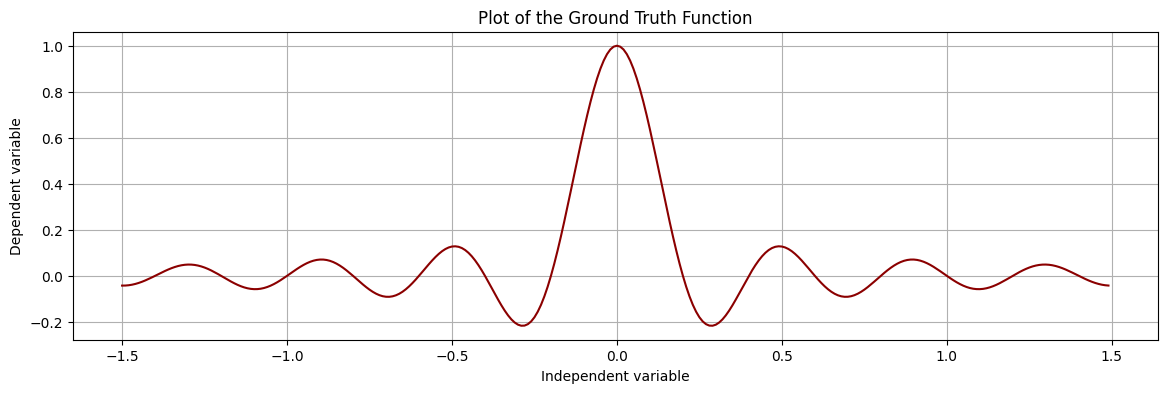

In [7]:

# Plotting the function
plt.figure(figsize=(14, 4))
plt.plot(x.numpy(), y.numpy(), color="darkred")
plt.title('Plot of the Ground Truth Function')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.grid()
plt.show()

In [11]:
def train_network(model, inputs, targets):
    max_epoch = 20000
    epoch_list,loss_list=[],[]
    no_convergence = True
    epoch = 0
    while no_convergence:
        epoch += 1
        prediction = model(inputs)
        loss = loss_function(prediction, targets)

        optimizer.zero_grad() #clear gradients for next epoch
        loss.backward() #compute gradients using back propogation
        optimizer.step()

        epoch_list.append(epoch)
        loss_list.append(loss.detach().numpy())

        if epoch % 500 == 0:
            print(f'Epoch: {epoch}, Loss = {loss.item():.4f}')

        if epoch == max_epoch:
                print("Max Epoch reached without convergence")
                no_convergence = False

        elif (epoch > 5) and  (loss_list[-1] < 0.001):
            if abs(loss_list[-3] - loss_list[-2]) < 1.0e-05 and abs(loss_list[-2] - loss_list[-1]) < 1.0e-05:
                print("Convergence reached with loss:",loss_list[-1])
                not_converged = False

    return epoch_list, loss_list, prediction

In [12]:
  # Define model 1 layers
layers = [
    nn.Linear(1, 5), nn.LeakyReLU(),
    nn.Linear(5, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 5), nn.LeakyReLU(),
    nn.Linear(5, 1)
]

# Instantiate model 1 using nn.Sequential
model_1 = nn.Sequential(*layers)

# Training setup
optimizer = optim.RMSprop(model_1.parameters(), lr=1e-3, weight_decay=1e-4)
loss_function = nn.MSELoss()

# Calculate and Print total parameters
pytorch_total_params = sum(p.numel() for p in model_1.parameters())
print(pytorch_total_params)

# Train the model 1
m1_epoch_list, m1_loss_list, m1_prediction = train_network(model_1, x, y)

571
Epoch: 500, Loss = 0.0044
Epoch: 1000, Loss = 0.0027
Epoch: 1500, Loss = 0.0025
Epoch: 2000, Loss = 0.0023
Epoch: 2500, Loss = 0.0025
Epoch: 3000, Loss = 0.0022
Epoch: 3500, Loss = 0.0027
Epoch: 4000, Loss = 0.0022
Epoch: 4500, Loss = 0.0023
Epoch: 5000, Loss = 0.0022
Epoch: 5500, Loss = 0.0025
Epoch: 6000, Loss = 0.0026
Epoch: 6500, Loss = 0.0022
Epoch: 7000, Loss = 0.0023
Epoch: 7500, Loss = 0.0022
Epoch: 8000, Loss = 0.0022
Epoch: 8500, Loss = 0.0019
Epoch: 9000, Loss = 0.0017
Epoch: 9500, Loss = 0.0014
Epoch: 10000, Loss = 0.0014
Epoch: 10500, Loss = 0.0014
Epoch: 11000, Loss = 0.0016
Epoch: 11500, Loss = 0.0012
Epoch: 12000, Loss = 0.0012
Epoch: 12500, Loss = 0.0013
Epoch: 13000, Loss = 0.0013
Epoch: 13500, Loss = 0.0015
Epoch: 14000, Loss = 0.0012
Epoch: 14500, Loss = 0.0012
Epoch: 15000, Loss = 0.0012
Epoch: 15500, Loss = 0.0012
Epoch: 16000, Loss = 0.0011
Epoch: 16500, Loss = 0.0015
Epoch: 17000, Loss = 0.0013
Epoch: 17500, Loss = 0.0012
Epoch: 18000, Loss = 0.0015
Epoch: 1

In [13]:
# Define model layers
layers_model_2 = [
    nn.Linear(1, 10), nn.LeakyReLU(),
    nn.Linear(10, 18), nn.LeakyReLU(),
    nn.Linear(18, 15), nn.LeakyReLU(),
    nn.Linear(15, 4), nn.LeakyReLU(),
    nn.Linear(4, 1)
]

# Instantiate model 2 using nn.Sequential
model_2 = nn.Sequential(*layers_model_2)

# Training setup
optimizer = optim.RMSprop(model_2.parameters(), lr=1e-3, weight_decay=1e-4)
loss_function = nn.MSELoss()

# Calculate and Print total parameters
pytorch_total_params = sum(p.numel() for p in model_2.parameters())
print(pytorch_total_params)

# Train the model 2
m2_epoch_list, m2_loss_list, m2_prediction = train_network(model_2, x, y)


572
Epoch: 500, Loss = 0.0176
Epoch: 1000, Loss = 0.0050
Epoch: 1500, Loss = 0.0037
Epoch: 2000, Loss = 0.0032
Epoch: 2500, Loss = 0.0030
Epoch: 3000, Loss = 0.0027
Epoch: 3500, Loss = 0.0027
Epoch: 4000, Loss = 0.0026
Epoch: 4500, Loss = 0.0025
Epoch: 5000, Loss = 0.0025
Epoch: 5500, Loss = 0.0023
Epoch: 6000, Loss = 0.0024
Epoch: 6500, Loss = 0.0023
Epoch: 7000, Loss = 0.0023
Epoch: 7500, Loss = 0.0022
Epoch: 8000, Loss = 0.0023
Epoch: 8500, Loss = 0.0022
Epoch: 9000, Loss = 0.0021
Epoch: 9500, Loss = 0.0021
Epoch: 10000, Loss = 0.0021
Epoch: 10500, Loss = 0.0020
Epoch: 11000, Loss = 0.0019
Epoch: 11500, Loss = 0.0019
Epoch: 12000, Loss = 0.0019
Epoch: 12500, Loss = 0.0017
Epoch: 13000, Loss = 0.0018
Epoch: 13500, Loss = 0.0017
Epoch: 14000, Loss = 0.0016
Epoch: 14500, Loss = 0.0016
Epoch: 15000, Loss = 0.0015
Epoch: 15500, Loss = 0.0015
Epoch: 16000, Loss = 0.0015
Epoch: 16500, Loss = 0.0015
Epoch: 17000, Loss = 0.0017
Epoch: 17500, Loss = 0.0016
Epoch: 18000, Loss = 0.0015
Epoch: 1

In [14]:

# Define model 3 layers
layers_model_3 = [
    nn.Linear(1, 190), nn.LeakyReLU(),
    nn.Linear(190, 1)
]

# instantiate model 3 using nn.Sequential
model_3 = nn.Sequential(*layers_model_3)

# Training setup
optimizer = optim.RMSprop(model_3.parameters(), lr=1e-3, weight_decay=1e-4)
loss_function = nn.MSELoss()

# Print total parameters
pytorch_total_params = sum(p.numel() for p in model_3.parameters())
print(pytorch_total_params)

# Train the model
m3_epoch_list, m3_loss_list, m3_prediction = train_network(model_3, x, y)


571
Epoch: 500, Loss = 0.0287
Epoch: 1000, Loss = 0.0208
Epoch: 1500, Loss = 0.0160
Epoch: 2000, Loss = 0.0130
Epoch: 2500, Loss = 0.0110
Epoch: 3000, Loss = 0.0097
Epoch: 3500, Loss = 0.0088
Epoch: 4000, Loss = 0.0080
Epoch: 4500, Loss = 0.0075
Epoch: 5000, Loss = 0.0071
Epoch: 5500, Loss = 0.0068
Epoch: 6000, Loss = 0.0065
Epoch: 6500, Loss = 0.0063
Epoch: 7000, Loss = 0.0061
Epoch: 7500, Loss = 0.0060
Epoch: 8000, Loss = 0.0059
Epoch: 8500, Loss = 0.0058
Epoch: 9000, Loss = 0.0057
Epoch: 9500, Loss = 0.0056
Epoch: 10000, Loss = 0.0055
Epoch: 10500, Loss = 0.0055
Epoch: 11000, Loss = 0.0054
Epoch: 11500, Loss = 0.0054
Epoch: 12000, Loss = 0.0053
Epoch: 12500, Loss = 0.0053
Epoch: 13000, Loss = 0.0052
Epoch: 13500, Loss = 0.0052
Epoch: 14000, Loss = 0.0051
Epoch: 14500, Loss = 0.0051
Epoch: 15000, Loss = 0.0051
Epoch: 15500, Loss = 0.0051
Epoch: 16000, Loss = 0.0050
Epoch: 16500, Loss = 0.0050
Epoch: 17000, Loss = 0.0050
Epoch: 17500, Loss = 0.0049
Epoch: 18000, Loss = 0.0049
Epoch: 1

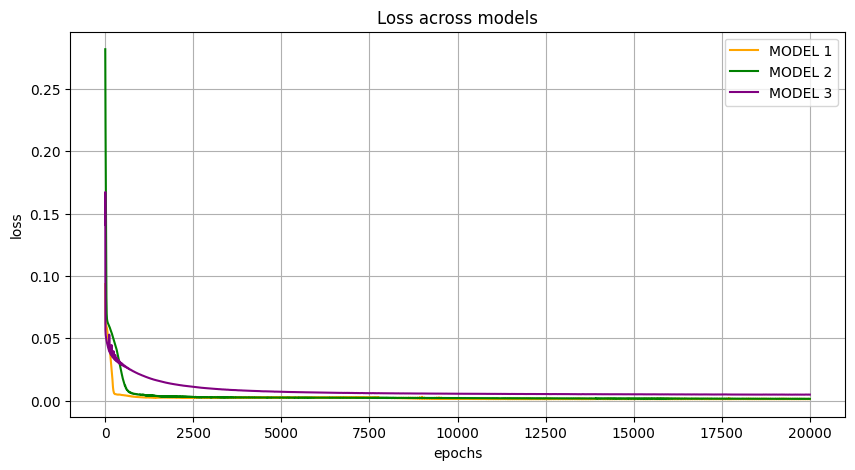

In [15]:
plt.figure(figsize=(10,5))
plt.plot(m1_epoch_list, m1_loss_list, color = "orange", label ="MODEL 1")
plt.plot(m2_epoch_list, m2_loss_list, color = "green", label ="MODEL 2")
plt.plot(m3_epoch_list, m3_loss_list, color = "purple", label ="MODEL 3")
plt.title('Loss across models')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()


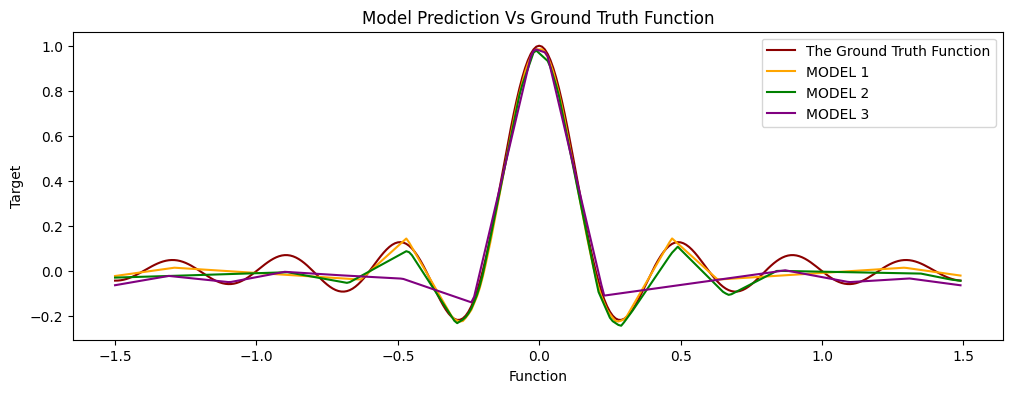

In [16]:
plt.figure(figsize=(12,4))
plt.plot(x, y, color="darkred", label = 'The Ground Truth Function')
plt.plot(x, m1_prediction.data, color="orange", label = 'MODEL 1')
plt.plot(x, m2_prediction.data, color="green", label = 'MODEL 2')
plt.plot(x, m3_prediction.data, color="purple", label = 'MODEL 3')
plt.title('Model Prediction Vs Ground Truth Function')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend(loc='upper right')
plt.show()

Function 2

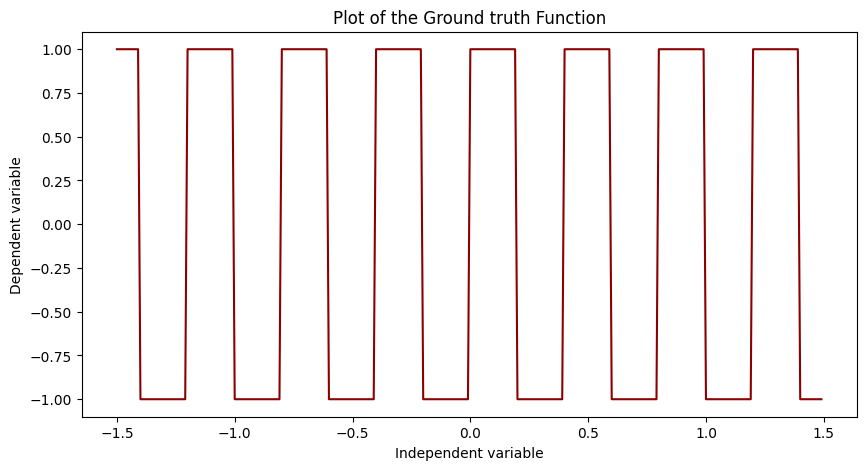

In [17]:
torch.manual_seed(1)
#input data
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
y = np.sign(np.sin(5*np.pi*x))
#arrays to tensor
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,5))
plt.plot(x, y, color = "darkred")
#Plotting the ground truth function
plt.title('Plot of the Ground truth Function')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

In [18]:
# Define model 4 layers
layers_model_4 = [
    nn.Linear(1, 5), nn.LeakyReLU(),
    nn.Linear(5, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 5), nn.LeakyReLU(),
    nn.Linear(5, 1)
]

model_4 = nn.Sequential(*layers_model_4)

optimizer = optim.Adam(model_4.parameters(), lr=1e-3, weight_decay=1e-4)
loss_function = nn.MSELoss()

# Print total parameters
pytorch_total_params = sum(p.numel() for p in model_4.parameters())
print(pytorch_total_params)

# Train the model
m1_epoch_list, m1_loss_list, m1_prediction = train_network(model_4, x, y)



571
Epoch: 500, Loss = 0.9994
Epoch: 1000, Loss = 0.6923
Epoch: 1500, Loss = 0.2504
Epoch: 2000, Loss = 0.1324
Epoch: 2500, Loss = 0.1039
Epoch: 3000, Loss = 0.0906
Epoch: 3500, Loss = 0.0820
Epoch: 4000, Loss = 0.0733
Epoch: 4500, Loss = 0.0687
Epoch: 5000, Loss = 0.0596
Epoch: 5500, Loss = 0.0531
Epoch: 6000, Loss = 0.0482
Epoch: 6500, Loss = 0.0474
Epoch: 7000, Loss = 0.0382
Epoch: 7500, Loss = 0.0342
Epoch: 8000, Loss = 0.0310
Epoch: 8500, Loss = 0.0278
Epoch: 9000, Loss = 0.0247
Epoch: 9500, Loss = 0.0219
Epoch: 10000, Loss = 0.0200
Epoch: 10500, Loss = 0.0239
Epoch: 11000, Loss = 0.0163
Epoch: 11500, Loss = 0.0168
Epoch: 12000, Loss = 0.0141
Epoch: 12500, Loss = 0.0109
Epoch: 13000, Loss = 0.0105
Epoch: 13500, Loss = 0.0088
Epoch: 14000, Loss = 0.0079
Epoch: 14500, Loss = 0.0081
Epoch: 15000, Loss = 0.0083
Epoch: 15500, Loss = 0.0065
Epoch: 16000, Loss = 0.0060
Epoch: 16500, Loss = 0.0056
Epoch: 17000, Loss = 0.0056
Epoch: 17500, Loss = 0.0068
Epoch: 18000, Loss = 0.0047
Epoch: 1

In [19]:
# Define model 5 layers
layers_model_5 = [
    nn.Linear(1, 10), nn.LeakyReLU(),
    nn.Linear(10, 18), nn.LeakyReLU(),
    nn.Linear(18, 15), nn.LeakyReLU(),
    nn.Linear(15, 4), nn.LeakyReLU(),
    nn.Linear(4, 1)
]

model_5 = nn.Sequential(*layers_model_5)
#optimization and loss function
optimizer = optim.Adam(model_5.parameters(), lr=1e-3, weight_decay=1e-4)
loss_func = nn.MSELoss()

# calculate and print total parameters
pytorch_total_params = sum(p.numel() for p in model_5.parameters())
print(pytorch_total_params)

# Train the model
m2_epoch_list, m2_loss_list, m2_prediction = train_network(model_5, x, y)



572
Epoch: 500, Loss = 0.9944
Epoch: 1000, Loss = 0.6939
Epoch: 1500, Loss = 0.4578
Epoch: 2000, Loss = 0.3447
Epoch: 2500, Loss = 0.3014
Epoch: 3000, Loss = 0.2799
Epoch: 3500, Loss = 0.2650
Epoch: 4000, Loss = 0.2504
Epoch: 4500, Loss = 0.2325
Epoch: 5000, Loss = 0.1920
Epoch: 5500, Loss = 0.1654
Epoch: 6000, Loss = 0.1587
Epoch: 6500, Loss = 0.1531
Epoch: 7000, Loss = 0.1454
Epoch: 7500, Loss = 0.1429
Epoch: 8000, Loss = 0.1410
Epoch: 8500, Loss = 0.1382
Epoch: 9000, Loss = 0.1346
Epoch: 9500, Loss = 0.1300
Epoch: 10000, Loss = 0.1280
Epoch: 10500, Loss = 0.1278
Epoch: 11000, Loss = 0.1284
Epoch: 11500, Loss = 0.1281
Epoch: 12000, Loss = 0.1265
Epoch: 12500, Loss = 0.1245
Epoch: 13000, Loss = 0.1267
Epoch: 13500, Loss = 0.1228
Epoch: 14000, Loss = 0.1216
Epoch: 14500, Loss = 0.1211
Epoch: 15000, Loss = 0.1243
Epoch: 15500, Loss = 0.1208
Epoch: 16000, Loss = 0.1244
Epoch: 16500, Loss = 0.1193
Epoch: 17000, Loss = 0.1195
Epoch: 17500, Loss = 0.1190
Epoch: 18000, Loss = 0.1184
Epoch: 1

In [20]:
# Define model 6 layers
layers_model_6 = [
    nn.Linear(1, 189), nn.LeakyReLU(),
    nn.Linear(189, 1)
]

# Create model instance using nn.Sequential
model_6 = nn.Sequential(*layers_model_6)

optimizer = optim.Adam(model_6.parameters(), lr=1e-3, weight_decay=1e-4)
loss_function = nn.MSELoss()

# Print total parameters
pytorch_total_params = sum(p.numel() for p in model_6.parameters())
print(pytorch_total_params)

# Train the model
m3_epoch_list, m3_loss_list, m3_prediction = train_network(model_6, x, y)

568
Epoch: 500, Loss = 0.8765
Epoch: 1000, Loss = 0.6697
Epoch: 1500, Loss = 0.5106
Epoch: 2000, Loss = 0.4022
Epoch: 2500, Loss = 0.3352
Epoch: 3000, Loss = 0.2955
Epoch: 3500, Loss = 0.2716
Epoch: 4000, Loss = 0.2562
Epoch: 4500, Loss = 0.2453
Epoch: 5000, Loss = 0.2368
Epoch: 5500, Loss = 0.2299
Epoch: 6000, Loss = 0.2240
Epoch: 6500, Loss = 0.2185
Epoch: 7000, Loss = 0.2148
Epoch: 7500, Loss = 0.2118
Epoch: 8000, Loss = 0.2094
Epoch: 8500, Loss = 0.2074
Epoch: 9000, Loss = 0.2057
Epoch: 9500, Loss = 0.2036
Epoch: 10000, Loss = 0.2020
Epoch: 10500, Loss = 0.2007
Epoch: 11000, Loss = 0.1995
Epoch: 11500, Loss = 0.1984
Epoch: 12000, Loss = 0.1974
Epoch: 12500, Loss = 0.1965
Epoch: 13000, Loss = 0.1956
Epoch: 13500, Loss = 0.1948
Epoch: 14000, Loss = 0.1940
Epoch: 14500, Loss = 0.1935
Epoch: 15000, Loss = 0.1926
Epoch: 15500, Loss = 0.1920
Epoch: 16000, Loss = 0.1914
Epoch: 16500, Loss = 0.1909
Epoch: 17000, Loss = 0.1903
Epoch: 17500, Loss = 0.1897
Epoch: 18000, Loss = 0.1892
Epoch: 1

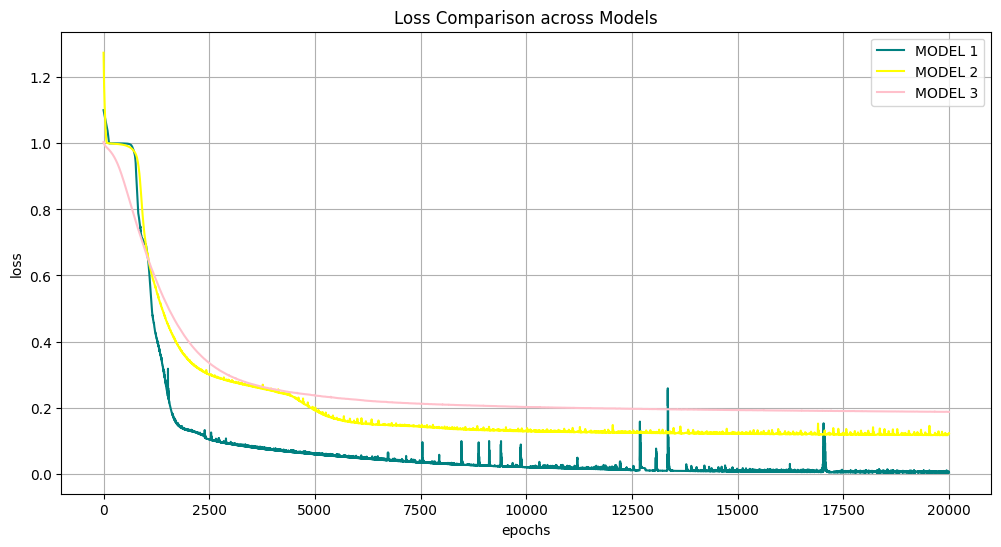

In [23]:
#visualising loss
plt.figure(figsize=(12,6))
plt.plot(m1_epoch_list, m1_loss_list, color = "teal", label = "MODEL 1")
plt.plot(m2_epoch_list, m2_loss_list, color = "yellow", label = "MODEL 2")
plt.plot(m3_epoch_list, m3_loss_list, color = "pink", label = "MODEL 3")
plt.title('Loss Comparison across Models')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

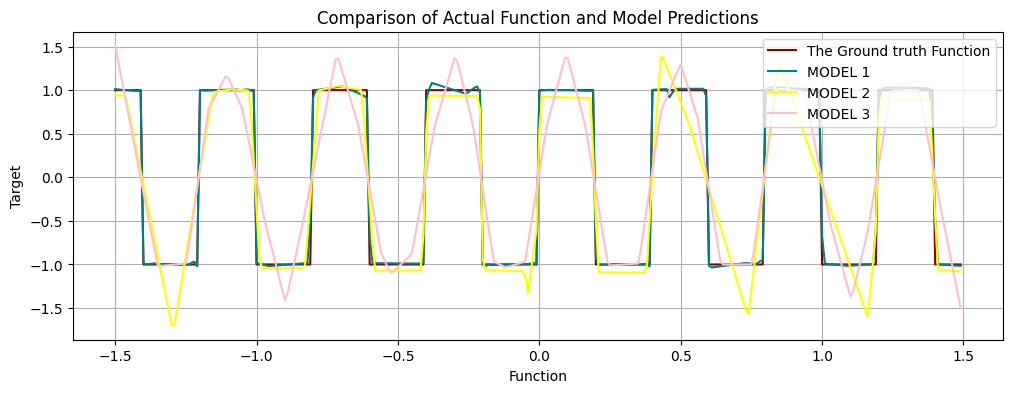

In [24]:
plt.figure(figsize=(12, 4))
plt.plot(x, y, color="darkred", label='The Ground truth Function')
plt.plot(x, m1_prediction.data, color="teal", label='MODEL 1')
plt.plot(x, m2_prediction.data, color="yellow", label='MODEL 2')
plt.plot(x, m3_prediction.data, color="pink", label='MODEL 3')
plt.title('Comparison of Actual Function and Model Predictions')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend(loc='upper right')
plt.grid()
plt.show()


In [25]:
# Load MNIST dataset
train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=600, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=100, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 14870918.08it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 491376.84it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4371623.82it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2674884.69it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [39]:
def train_model(model, total_epochs):
    model.train()
    total_batches = len(train_loader)
    loss_history = []
    epoch_list = []
    accuracy_list = []
    is_converged = True
    current_epoch = 0
    average_loss_history = []

    while is_converged:
        current_epoch += 1
        correct_predictions = 0
        total_samples = 0
        total_loss = 0

        for batch_index, (input_images, target_labels) in enumerate(train_loader):
            outputs = model(input_images)
            loss_value = loss_function(outputs, target_labels)
            total_loss += loss_value.detach().numpy()

            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()

            _, predicted_classes = torch.max(outputs.data, 1)
            total_samples += target_labels.size(0)
            correct_predictions += (predicted_classes == target_labels).sum().item()
            accuracy = 100.0 * correct_predictions / total_samples

            if (batch_index + 1) % 100 == 0:
                print(f'Epoch [{current_epoch}/{total_epochs}], Batch [{batch_index + 1}/{total_batches}], Loss: {loss_value.item():.4f}', end='\r', flush=True)
                epoch_list.append(current_epoch)
                loss_history.append(loss_value.item())
                print(f'Epoch [{current_epoch}/{total_epochs}], Accuracy: {accuracy:.2f} %', end='\r', flush=True)
                accuracy_list.append(accuracy)

                if current_epoch == total_epochs:
                    print(f"Max Epoch Reached, Loss: {loss_value.item():.4f}, Accuracy: {accuracy:.2f}%")
                    is_converged = False
                elif (current_epoch > 5) and (loss_history[-1] < 0.001):
                    if abs(loss_history[-3] - loss_history[-2]) < 1.0e-05 and abs(loss_history[-2] - loss_history[-1]) < 1.0e-05:
                        print("Convergence reached for loss:", loss_history[-1])
                        is_converged = False

        average_loss_history.append(total_loss / (batch_index + 1))

    return epoch_list, loss_history, accuracy_list, average_loss_history


input_dim = 784
max_epochs = 20
learning_rate_value = 0.001
conv_kernel_size = 4
weight_decay_value = 1e-4
dropout_rate = 0.25



In [31]:
input_size = 784
max_epochs = 20
learn_rate = 0.001
kernel_size = 4
weight_decay_value = 1e-4
dropout = 0.25

In [40]:
# Define the first ConvNet
class FirstConvNet(nn.Module):
    def __init__(self):
        super(FirstConvNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(1, 10, conv_kernel_size)
        self.pool_layer = nn.MaxPool2d(2, 2)
        self.conv_layer2 = nn.Conv2d(10, 20, conv_kernel_size)
        self.fc_layer1 = nn.Linear(320, 50)
        self.dropout_layer = nn.Dropout(dropout_rate)
        self.fc_layer2 = nn.Linear(50, 100)
        self.fc_layer3 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.pool_layer(F.relu(self.conv_layer1(x)))
        x = self.pool_layer(F.relu(self.conv_layer2(x)))
        x = x.view(-1, 320)
        x = F.relu(self.fc_layer1(x))
        x = self.dropout_layer(x)
        x = F.relu(self.fc_layer2(x))
        x = self.fc_layer3(x)
        return x


# Create the first ConvNet instance
first_convnet = FirstConvNet()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(first_convnet.parameters(), lr=learning_rate_value, weight_decay=weight_decay_value)

# Train the first ConvNet
epochs1, loss_values1, accuracy_values1, avg_loss_values1 = train_model(first_convnet, max_epochs)



Max Epoch Reached, Loss: 0.0433, Accuracy: 98.28%


In [41]:
# Define the second ConvNet
class SecondConvNet(nn.Module):
    def __init__(self):
        super(SecondConvNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(1, 10, conv_kernel_size)
        self.pool_layer = nn.MaxPool2d(2, 2)
        self.conv_layer2 = nn.Conv2d(10, 20, conv_kernel_size)
        self.fc_layer1 = nn.Linear(20 * conv_kernel_size * conv_kernel_size, 50)
        self.fc_layer2 = nn.Linear(50, 50)
        self.fc_layer3 = nn.Linear(50, 40)
        self.fc_layer4 = nn.Linear(40, 30)
        self.fc_layer5 = nn.Linear(30, 10)

    def forward(self, x):
        x = self.pool_layer(F.relu(self.conv_layer1(x)))
        x = self.pool_layer(F.relu(self.conv_layer2(x)))
        x = x.view(-1, 320)
        x = F.relu(self.fc_layer1(x))
        x = F.relu(self.fc_layer2(x))
        x = F.relu(self.fc_layer3(x))
        x = F.relu(self.fc_layer4(x))
        x = self.fc_layer5(x)
        return x


# Create the second ConvNet instance
second_convnet = SecondConvNet()
optimizer = torch.optim.Adam(second_convnet.parameters(), lr=learning_rate_value, weight_decay=weight_decay_value)

# Train the second ConvNet
epochs2, loss_values2, accuracy_values2, avg_loss_values2 = train_model(second_convnet, max_epochs)


Max Epoch Reached, Loss: 0.0545, Accuracy: 98.36%


In [42]:
# Define the third ConvNet
class ThirdConvNet(nn.Module):
    def __init__(self):
        super(ThirdConvNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(1, 10, 5)
        self.pool_layer = nn.MaxPool2d(2, 2)
        self.conv_layer2 = nn.Conv2d(10, 15, 5)
        self.fc_layer1 = nn.Linear(15 * 4 * 4, 86)
        self.fc_layer2 = nn.Linear(86, 10)

    def forward(self, x):
        x = self.pool_layer(F.relu(self.conv_layer1(x)))
        x = self.pool_layer(F.relu(self.conv_layer2(x)))
        x = x.view(-1, 15 * 4 * 4)
        x = F.relu(self.fc_layer1(x))
        x = self.fc_layer2(x)
        return x


# Create the third ConvNet instance
third_convnet = ThirdConvNet()
optimizer = torch.optim.Adam(third_convnet.parameters(), lr=learning_rate_value, weight_decay=weight_decay_value)

# Train the third ConvNet
epochs3, loss_values3, accuracy_values3, avg_loss_values3 = train_model(third_convnet, max_epochs)



Max Epoch Reached, Loss: 0.0207, Accuracy: 99.18%


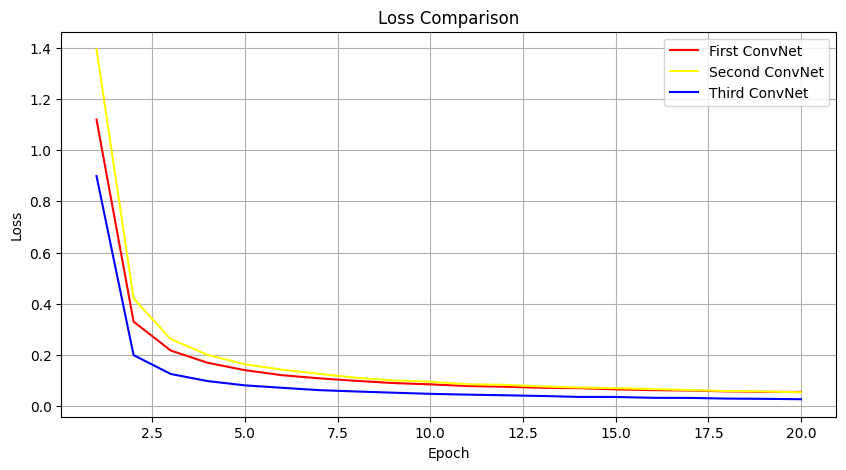

In [43]:
# Plot for loss comparison
plt.figure(figsize=(10, 5))
plt.plot(epochs1, avg_loss_values1, color="red", label="First ConvNet")
plt.plot(epochs2, avg_loss_values2, color="yellow", label="Second ConvNet")
plt.plot(epochs3, avg_loss_values3, color="blue", label="Third ConvNet")
plt.title('Loss Comparison')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

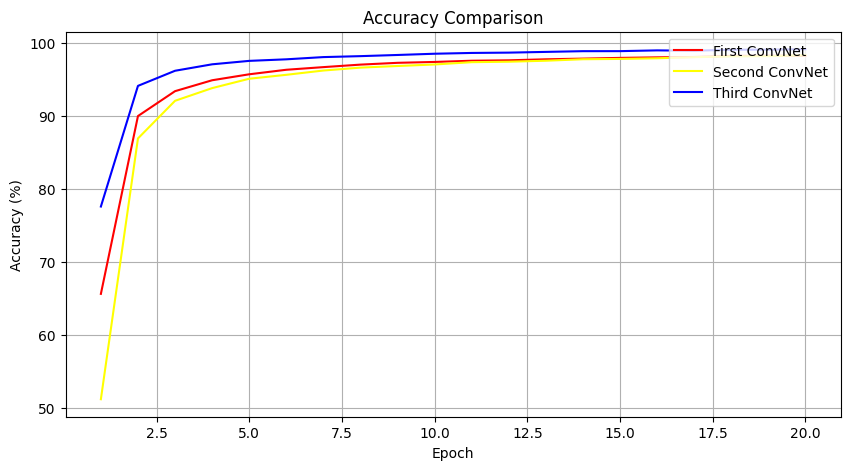

In [44]:
# Plot for accuracy comparison
plt.figure(figsize=(10, 5))
plt.plot(epochs1, accuracy_values1, color="red", label="First ConvNet")
plt.plot(epochs2, accuracy_values2, color="yellow", label="Second ConvNet")
plt.plot(epochs3, accuracy_values3, color="blue", label="Third ConvNet")
plt.title('Accuracy Comparison')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid()
plt.show()

 **Train on Actual Tasks**